In [1]:
import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# data set
from tensorflow.keras.datasets import cifar10

from sklearn.metrics import classification_report, confusion_matrix



import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 25s 0us/step


In [3]:
# has three channels for color

x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

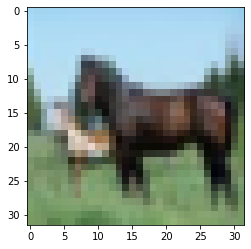

In [7]:
plt.imshow(x_train[12])

In [10]:
x_train[0].max()

255

In [11]:
# normalize the color scales

x_train = x_train/255
x_test = x_test/255

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
# unique, counts = np.unique(x, return_counts=True)
# print np.asarray((unique, counts)).T

unique, counts = np.unique(y_train, return_counts=True)
print((unique, counts))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [14]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [23]:
# input shape for single image 28 x 28 x 1 (color channel)

model = Sequential()

# each layer needs a layer and a pooling layer
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))


# for color need more layers
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten for loading in dense layer
model.add(Flatten())

# make model dense layer larger due to complexity
model.add(Dense(256, activation='relu'))

# output layer
# use softmax for multiclass vs binary
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
# could also set monitor = 'val_accuracy'

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [27]:
model.fit(x_train, y_cat_train, epochs=15,
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 39s 783us/sample - loss: 1.4960 - accuracy: 0.4607 - val_loss: 1.2481 - val_accuracy: 0.5580
Epoch 2/15
50000/50000 [==============================] - 42s 830us/sample - loss: 1.1656 - accuracy: 0.5883 - val_loss: 1.1394 - val_accuracy: 0.5986
Epoch 3/15
50000/50000 [==============================] - 44s 888us/sample - loss: 1.0070 - accuracy: 0.6470 - val_loss: 1.0469 - val_accuracy: 0.6389
Epoch 4/15
50000/50000 [==============================] - 48s 967us/sample - loss: 0.8960 - accuracy: 0.6881 - val_loss: 0.9824 - val_accuracy: 0.6608
Epoch 5/15
50000/50000 [==============================] - 50s 995us/sample - loss: 0.8100 - accuracy: 0.7168 - val_loss: 0.9957 - val_accuracy: 0.6595
Epoch 6/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.7321 - accuracy: 0.7439 - val_loss: 0.9667 - val_accuracy: 0.6761
Epoch 7/15
50000/50000 [======================

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.495950,0.46068,1.248109,0.5580
1,1.165634,0.58828,1.139406,0.5986
2,1.006951,0.64698,1.046922,0.6389
3,0.895996,0.68810,0.982439,0.6608
4,0.810004,0.71676,0.995680,0.6595
5,0.732063,0.74390,0.966724,0.6761
6,0.657658,0.76918,0.993482,0.6794
7,0.591041,0.79192,0.982747,0.6896


In [31]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

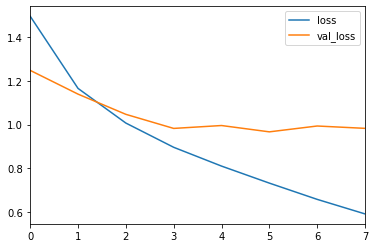

In [30]:
metrics[['loss', 'val_loss']].plot()

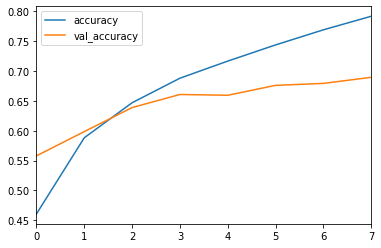

In [32]:
metrics[['accuracy', 'val_accuracy']].plot()

In [33]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9827468921661376, 0.6896]

In [34]:
predictions = model.predict_classes(x_test)

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.84      0.80      0.82      1000
           2       0.58      0.59      0.58      1000
           3       0.51      0.47      0.49      1000
           4       0.66      0.59      0.62      1000
           5       0.54      0.65      0.59      1000
           6       0.73      0.80      0.76      1000
           7       0.81      0.69      0.75      1000
           8       0.85      0.72      0.78      1000
           9       0.73      0.82      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [38]:
# perfroms not so well on Cat 3 and Cat 5 (cats/dogs)

In [36]:
confusion_matrix(y_test, predictions)

array([[756,  20,  58,  22,  15,  13,  12,  11,  49,  44],
       [ 25, 801,  14,   9,   4,   7,  16,   2,  16, 106],
       [ 68,   7, 589,  71,  65,  90,  71,  20,   5,  14],
       [ 24,  13,  67, 475,  71, 214,  76,  24,  13,  23],
       [ 29,   5, 120,  60, 592,  62,  59,  50,  16,   7],
       [ 16,   3,  49, 155,  46, 649,  36,  28,   3,  15],
       [ 12,   3,  43,  50,  33,  39, 796,  10,   3,  11],
       [ 21,   6,  36,  49,  62, 101,  10, 690,   1,  24],
       [103,  33,  26,  23,   6,  15,  11,   5, 724,  54],
       [ 31,  62,  14,  15,   8,  12,   7,   9,  18, 824]])

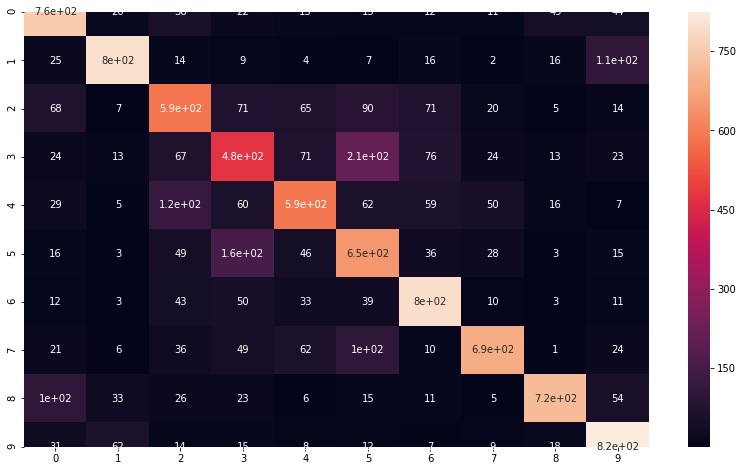

In [39]:
plt.figure(figsize=(14,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [47]:
my_image = x_test[16]
my_image

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

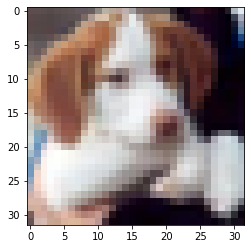

In [48]:
plt.imshow(my_image)

In [49]:
# get teh category for it

y_test[16]

array([5], dtype=uint8)

In [50]:
# reshape to 1 image, 32 x 32 and 3 color channels

model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([5])